# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [21]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

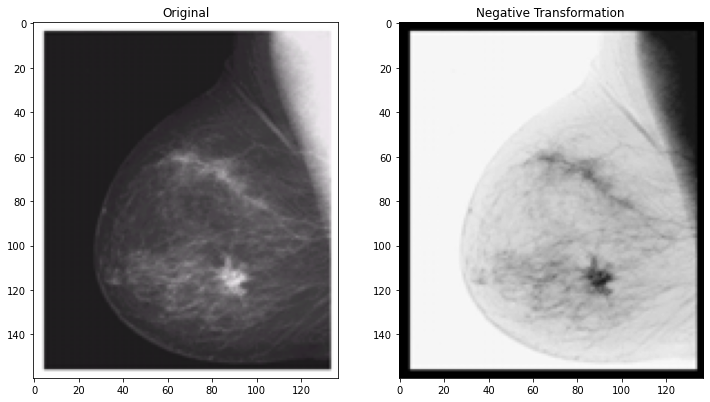

In [88]:
'''
1
Negative Transformation
'''
def Negative(image):
    return (255 - image)


originalImage = io.imread('./imgs/Picture1.png')
picture1 = rgb2gray(rgba2rgb(originalImage))
show_images(images = [originalImage,Negative(picture1)],
                        titles = ['Original', 'Negative Transformation'])

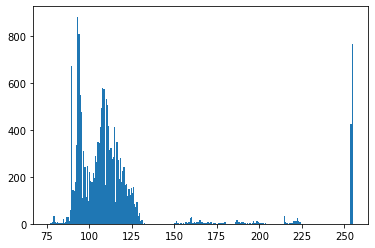

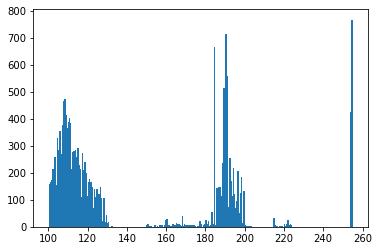

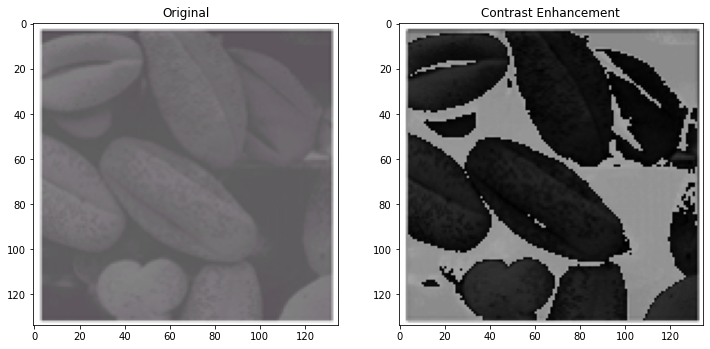

In [183]:
'''
2
Contrast Enhancement
0 => 100
50 => 200
slope = 200-50 / 100-0 =  3/2
y = 3x/2 + 50
'''
def Contrast_enhancement(image):
    def mapping(value):
        return ((3*value*255/2) + 50)/255
    newImage = np.copy(image)
    newImage[(newImage > 0) & (newImage < 100/255)] = mapping(newImage[(newImage > 0) & (newImage < 100/255)])
    return newImage

originalImage = io.imread('./imgs/Picture2.png')
picture2 = rgb2gray(rgba2rgb(io.imread('./imgs/Picture2.png')))

enhancedImage = Contrast_enhancement(picture2)

showHist(picture2)
showHist(enhancedImage)
show_images(images = [originalImage,enhancedImage], titles = ['Original', 'Contrast Enhancement'])

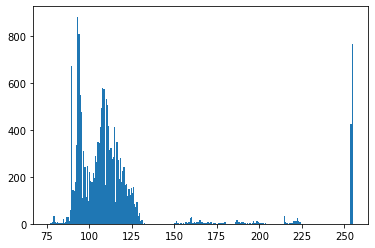

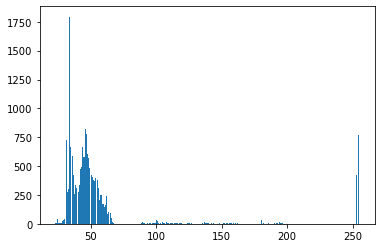

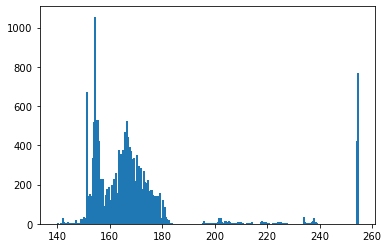

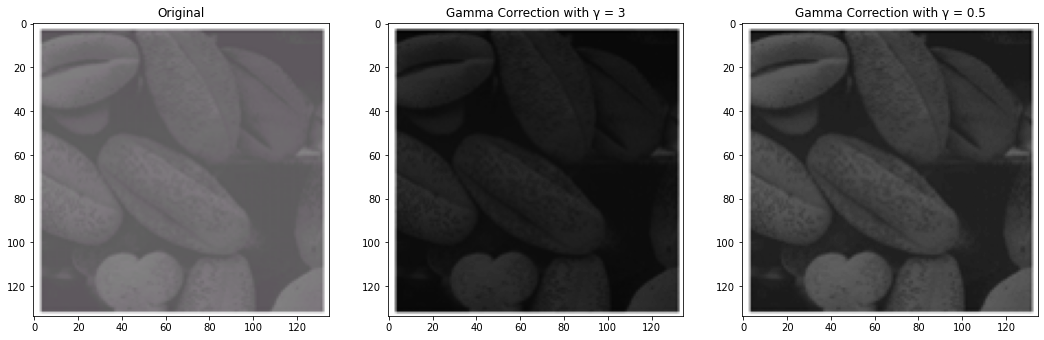

In [89]:
'''
3
Gamma Correction
'''
def Gamma_Correction(image,c = 1, y = 1):
    return (c*(image**y))


originalImage = io.imread('./imgs/Picture2.png')
picture2 = rgb2gray(rgba2rgb(originalImage))
gammaImage1 = Gamma_Correction(picture2,c=1,y=2)
gammaImage2 = Gamma_Correction(picture2,c=1,y=0.5)
showHist(picture2)
showHist(gammaImage1)
showHist(gammaImage2)
show_images(images = [originalImage,gammaImage1,gammaImage2], titles = ['Original', 'Gamma Correction with γ = 3', 'Gamma Correction with γ = 0.5'])


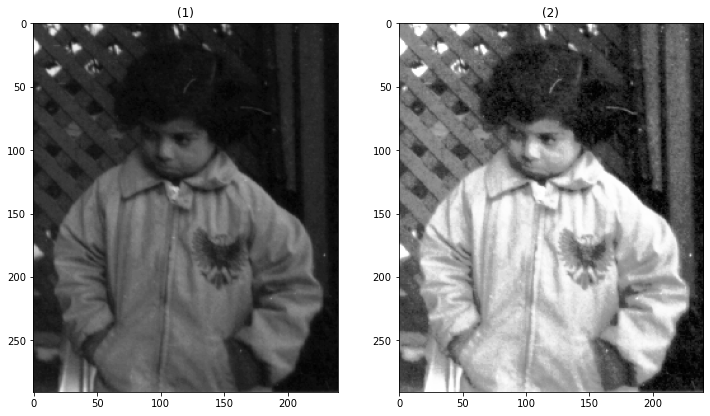

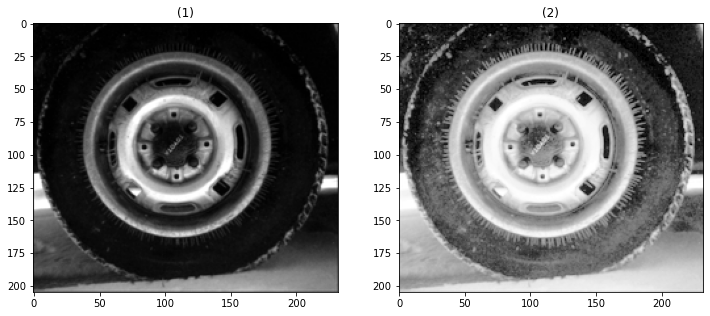

In [187]:
import numpy as np 

def imhist(im):
  # calculates normalized histogram of an image
	m, n = im.shape
	h = [0.0] * 256
	for i in range(m):
		for j in range(n):
			h[im[i, j]]+=1
	return np.array(h)/(m*n)

def cumsum(h):
	# finds cumulative sum of a numpy array, list
	return [sum(h[:i+1]) for i in range(len(h))]

def histeq(im):
	#calculate Histogram
	h = imhist(im)
	cdf = np.array(cumsum(h)) #cumulative distribution function
	sk = np.uint8(255 * cdf) #finding transfer function values
	s1, s2 = im.shape
	Y = np.zeros_like(im)
	# applying transfered values for each pixels
	for i in range(0, s1):
		for j in range(0, s2):
			Y[i, j] = sk[im[i, j]]
	H = imhist(Y)
	#return transformed image, original and new istogram, 
	# and transform function
	return Y


    
pout = io.imread('./imgs/pout.tif')
tire = io.imread('./imgs/tire.tif')


HisEQ_image= histeq(pout)
show_images(images=[pout,HisEQ_image])

HisEQ_image= histeq(tire)
show_images(images=[tire,HisEQ_image])

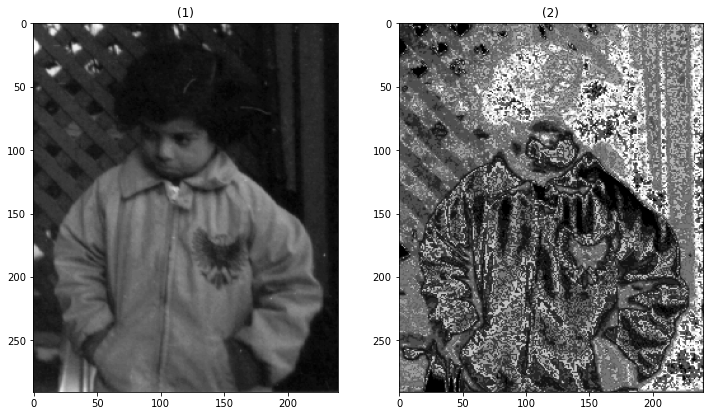

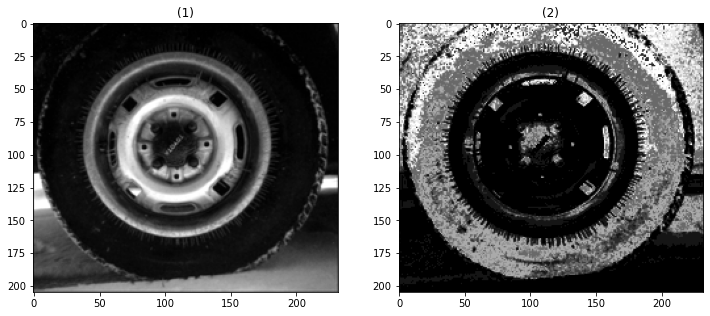

In [189]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''
def Histogram_Equalization(image):
    def G_levelHistogram(im):
        m, n = im.shape
        h = np.zeros(256)
        unique,unique_counts = np.unique(image,return_counts = True)
        h[unique]=unique_counts
        return np.array(h)/(m*n)

    def cumsum(h):
        # finds cumulative sum of a numpy array, list
        return [sum(h[:i+1]) for i in range(len(h))]

    #Calculate the histogram of gray-levels for the image
    h = G_levelHistogram(image)
    
    cdf = np.array(cumsum(h))
    sk = np.uint8(255 * cdf)
    s1, s2 = image.shape
    
    new_img = np.zeros(image.shape)
    
    for i in range(0, s1):
        for j in range(0, s2):
            new_img[i, j] = sk[image[i, j]]
    H = G_levelHistogram(new_img)
    return new_img

def getImageWithHist(name,ext,nbins=256):
    pass
    

'''
************************************
'''
pout = io.imread('./imgs/pout.tif')
tire = io.imread('./imgs/tire.tif')


new_img= Histogram_Equalization(pout)
show_images(images=[pout,new_img])